<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/04-text-mining/Sentiment_analysis_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment analysis:

Looking at the ham/spam dataset, we don't have labels that say whether a message is positive or negative.  But we can check whether a message is more similar to a positive or a negative embedding.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/elhamod/BA820/main/Hands-on/04-text-mining/movie.csv")

df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Inspect

Is the dataset balanced?

In [ ]:
df["label"].value_counts()

0    20019
1    19981
Name: label, dtype: int64

Perhps, we look at the message length.

<Axes: >

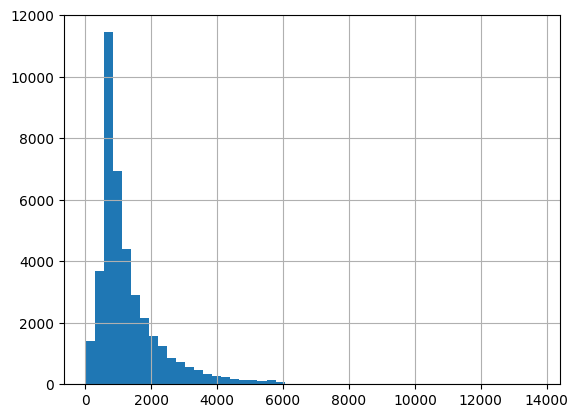

In [ ]:
df["text"].apply(lambda x: len(x)).hist(bins=50)

Let's sample a subset.

In [ ]:
df = df.sample(4000)

##pre-processing

Cleaning up and tokenizing...

In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

df["text_prcessed"] = df["text"].str.lower()

df["text_prcessed"] = df["text_prcessed"].replace('<br />', ' ', regex=True)

df["text_prcessed"] = df["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)


tokenized_reviews = [word_tokenize(review) for review in df["text_prcessed"]]

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
for indx, tokens in enumerate(tokenized_reviews):
  tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]


df["tokenized"] = tokenized_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,text,label,text_prcessed,tokenized
20962,I usually start by relaying the premise of the...,0,i usually start by relaying the premise of the...,"[usually, start, relaying, premise, film, anyo..."
38057,"One of the funniest, most romantic, and most m...",1,one of the funniest most romantic and most m...,"[one, funniest, romantic, musical, movies, eve..."
4951,The movie has an excellent screenplay (the sit...,1,the movie has an excellent screenplay the sit...,"[movie, excellent, screenplay, situation, cred..."
11678,The plot sounds vaguely interesting ... a scie...,0,the plot sounds vaguely interesting a scie...,"[plot, sounds, vaguely, interesting, scientist..."
8965,It's the nature of businesses to try to capita...,0,it s the nature of businesses to try to capita...,"[nature, businesses, try, capitalize, others, ..."


##Vectorize

Build the word embedding model.

In [ ]:
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Either build your own model (pros and cons?)


# Or load a pre-trained model (pros and cons?)


Get the word embeddings.

##Classify

## Unsupervised approach

Let's construct two vectors, one is the ideal positive vector, and another is the ideal negatove one.

Let's test similarity with some review.

Let's apply this to all reviews

Let's take the mean as the splitting point between positive and negative sentiments.

Let's test our theory on a test set.